In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
sns.set_style("whitegrid")

# Load Data

In [4]:
observations = pd.read_csv('observations.csv')
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [5]:
species = pd.read_csv('species_info.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


# Data Characteristic

In [6]:
print(f'Observation shape: {observations.shape}')
print(f'Species shape: {species.shape}')

Observation shape: (23296, 3)
Species shape: (5824, 4)


In [7]:
observations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [8]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


# Data Exploration

In [9]:
print(f'Number of parks: {observations.park_name.nunique()}')
print(f'Parks: {observations.park_name.unique()}')

Number of parks: 4
Parks: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


In [10]:
print(f'Number of observations: {observations.observations.sum()}')

Number of observations: 3314739


In [11]:
print(f'Number of species: {species.scientific_name.nunique()}')

Number of species: 5541


In [12]:
print(f'Number of category: {species.category.nunique()}')
print(f'Categories: {species.category.unique()}')

Number of category: 7
Categories: ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


In [13]:
species.groupby('category').size()

category
Amphibian              80
Bird                  521
Fish                  127
Mammal                214
Nonvascular Plant     333
Reptile                79
Vascular Plant       4470
dtype: int64

In [14]:
print(f'Number of conservation status: {species.conservation_status.nunique()}')
print(f'Conservation statuses: {species.conservation_status.unique()}')

Number of conservation status: 4
Conservation statuses: [nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


In [15]:
species.groupby('conservation_status').size()

conservation_status
Endangered             16
In Recovery             4
Species of Concern    161
Threatened             10
dtype: int64

In [16]:
print(f'Number of null value: {species.conservation_status.isna().sum()}')

Number of null value: 5633


Terdapat 5633 baris dengan nilai null pada kolom 'conservation_status' pada dataset species.

# Analysis

Karna banyak baris dengan kolom 'conservation_status' bernilai 'nan' maka akan dilakukan perubahan/pengisian data dengan merubah nilai 'nan' menjadi 'No Intervention'.

In [17]:
species.fillna('No Intervention', inplace=True)
species.groupby('conservation_status').size()

conservation_status
Endangered              16
In Recovery              4
No Intervention       5633
Species of Concern     161
Threatened              10
dtype: int64

## 1. What is the distribution of conservation_status for animals?

In [18]:
conservationCategory = species[species.conservation_status != 'No Intervention'].groupby(['conservation_status', 'category']).scientific_name.count().unstack()
conservationCategory

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


Text(0.5, 1.0, 'Distribution of Conservation Status')

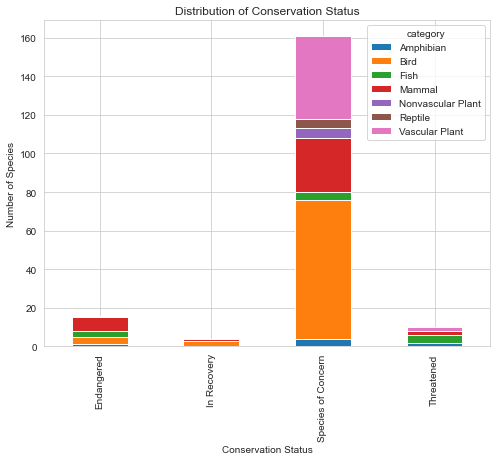

In [19]:
ax = conservationCategory.plot(kind='bar', stacked=True, figsize=(8,6))
ax.set_xlabel('Conservation Status')
ax.set_ylabel('Number of Species')
ax.set_title('Distribution of Conservation Status')

## 2. Are certain types of species more likely to be endangered?

In [20]:
species['is_protected'] = species.conservation_status != 'No Intervention'
species.head()

,category,scientific_name,common_names,conservation_status,is_protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False


In [21]:
category_protected = species.groupby(['category', 'is_protected']).scientific_name.nunique().reset_index().pivot(columns='is_protected', index='category', values='scientific_name').reset_index()
category_protected.columns = ['category', 'not_protected', 'protected']
category_protected

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [22]:
category_protected['percentage_protected'] = category_protected.protected / (category_protected.not_protected + category_protected.protected) * 100
category_protected

,category,not_protected,protected,percentage_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


## 3. Are the differences between species and their conservation status significant?

Pada bagian ini akan digunakan Hypothesis Testing dengan menggunakan chi-squared untuk mengetahui apakah perbedaan antar spesies dan status konservasinya signifikan.

In [23]:
from scipy.stats import chi2_contingency

Perbandingan pertama adalah category 'Mammal' dengan 'Bird'.

Dengan significant threshold 0.05.

Tabel contigency 'Mammal' dan 'Bird' akan berbentuk seperti ini:

|        | Protected | Not Protected |
|--------|-----------|---------------|
| Mammal |    30     |       146     |
| Bird   |    74     |      413      |

In [29]:
contigency_mb = [[30, 146],
                [74, 413]]

In [30]:
chi2, pval, dof, expected = chi2_contingency(contigency_mb)

print(f'P-Value: {pval}')
print(expected)

P-Value: 0.6472413381137023
[[ 27.60784314 148.39215686]
 [ 76.39215686 410.60784314]]


Perbedaan antara spesies 'Mammal' dan 'Bird' ***Tidak Signifikan***,

karena p-value yang didapat adalah 0.65 dan tidak lebih kecil dari 0.05.

Perbandingan berikutnya adalah category 'Mammal' dan 'Reptile'.

Tabel contigency 'Mammal' dan 'Reptile' akan berbentuk seperti ini:

|        | Protected | Not Protected |
|--------|-----------|---------------|
| Mammal |    30     |       146     |
| Reptile|    5      |      73       |

In [31]:
contigency_mr = [[30, 146],
                [5, 73]]

In [32]:
chi2, pval, dof, expected = chi2_contingency(contigency_mr)

print(f'P-Value: {pval}')
print(expected)

P-Value: 0.03835559022969898
[[ 24.2519685 151.7480315]
 [ 10.7480315  67.2519685]]


Perbedaan antara spesies 'Mammal' dan 'Reptile' ***Signifikan***,

karena p-value yang didapat adalah 0.038 yang mana lebih kecil dari significant threshold yaitu 0.05.

## 4. Which species were spotted the most at each park?

Menggunakan fungsi 'Chain' yang berasal dari library 'itertools' untuk mengelompokan sekumpulan list untuk dijadikan kedalam satu list.

In [33]:
from itertools import chain
import string

Membuat fungsi untuk menghilangkan tanda koma ( , ) pada kolom 'common_names'

In [34]:
def remove_coma(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

Memisahkan setiap nama pada kolom 'common_names' dengan kategori 'Mammal' untuk dijadikan string yang terpisah.

In [37]:
mammal_common_names = species[species.category == 'Mammal'].common_names.apply(remove_coma).str.split().tolist()
mammal_common_names[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison', 'Bison'],
 ['Aurochs',
  'Aurochs',
  'Domestic',
  'Cattle',
  'Feral',
  'Domesticated',
  'Cattle'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Sheep', 'Sheep', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

Menghilangkan nama yang duplikat.

In [39]:
clean_names = []
for item in mammal_common_names:
    item = list(dict.fromkeys(item))
    clean_names.append(item)
clean_names[:6]

[['Gappers', 'RedBacked', 'Vole'],
 ['American', 'Bison'],
 ['Aurochs', 'Domestic', 'Cattle', 'Feral', 'Domesticated'],
 ['Domestic', 'Sheep', 'Mouflon', 'Red', 'Feral'],
 ['Wapiti', 'Or', 'Elk'],
 ['WhiteTailed', 'Deer']]

Menggunakan fungsi chain untuk menggabungkan beberapa list nama, menjadi satu list nama.

In [42]:
clean_data = list(chain.from_iterable(i if isinstance(i, list) else [i] for i in clean_names))
clean_data[:6]

['Gappers', 'RedBacked', 'Vole', 'American', 'Bison', 'Aurochs']

Menghitung jumlah kata/nama yang muncul.

In [44]:
word_count = []
for i in clean_data:
    x = clean_data.count(i)
    word_count.append((i,x))
word_count[:6]

[('Gappers', 1),
 ('RedBacked', 2),
 ('Vole', 11),
 ('American', 12),
 ('Bison', 2),
 ('Aurochs', 1)]

Menjadikan list diatas menjadi sebuah dataframe yang diurutkan berdasarkan jumlah kemunculan kata/nama tertinggi ke terendah.

In [47]:
word_data = pd.DataFrame(set(word_count), columns=['Word', 'Count']).sort_values('Count', ascending=False)
word_data.head()

,Word,Count
133,Bat,23
88,Shrew,18
114,Myotis,17
91,Mouse,16
135,Chipmunk,13


Dapat dilihat kata/nama 'Bat' menjadi spesies mamalia paling sering muncul pada dataset Species sebanyak 23 kali.

Membuat kolom baru pada dataframe 'species' yang bernama 'is_bat' yang berisi True jika data tersebut adalah kelelawar dan False jika bukan.

In [48]:
species['is_bat'] = species.common_names.str.contains(r'\bBat\b', regex=True)
species.head()

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention,False,False
1,Mammal,Bos bison,"American Bison, Bison",No Intervention,False,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention,False,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention,False,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention,False,False


In [50]:
species[species.is_bat]

,category,scientific_name,common_names,conservation_status,is_protected,is_bat
28,Mammal,Corynorhinus rafinesquii,Rafinesque's Big-Eared Bat,No Intervention,False,True
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern,True,True
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern,True,True
31,Mammal,Lasiurus borealis,"Eastern Red Bat, Red Bat",No Intervention,False,True
32,Mammal,Lasiurus cinereus,Hoary Bat,No Intervention,False,True
36,Mammal,Myotis leibii,"Eastern Small-Footed Bat, Eastern Small-Footed...",Species of Concern,True,True
37,Mammal,Myotis lucifugus,"Little Brown Bat, Little Brown Myotis",Species of Concern,True,True
38,Mammal,Myotis septentrionalis,"Northern Long-Eared Bat, Northern Myotis",Threatened,True,True
39,Mammal,Myotis sodalis,"Indiana Bat, Indiana Or Social Myotis",Endangered,True,True
40,Mammal,Nycticeius humeralis,Evening Bat,No Intervention,False,True


Membuat dataframe yang bernama 'bat_observation' yang menggabungkan dataframe 'observations' dengan 'species' dengan kondisi species.is_bat == True 

In [52]:
bat_observation = observations.merge(species[species.is_bat])
bat_observation.head()

,scientific_name,park_name,observations,category,common_names,conservation_status,is_protected,is_bat
0,Lasiurus blossevillii,Bryce National Park,113,Mammal,Western Red Bat,Species of Concern,True,True
1,Lasiurus blossevillii,Great Smoky Mountains National Park,70,Mammal,Western Red Bat,Species of Concern,True,True
2,Lasiurus blossevillii,Yosemite National Park,123,Mammal,Western Red Bat,Species of Concern,True,True
3,Lasiurus blossevillii,Yellowstone National Park,221,Mammal,Western Red Bat,Species of Concern,True,True
4,Corynorhinus rafinesquii,Yosemite National Park,188,Mammal,Rafinesque's Big-Eared Bat,No Intervention,False,True


In [54]:
bat_observation.groupby('park_name').observations.sum().reset_index()

,park_name,observations
0,Bryce National Park,3433
1,Great Smoky Mountains National Park,2411
2,Yellowstone National Park,8362
3,Yosemite National Park,4786


In [57]:
bat_park = bat_observation.groupby(['park_name', 'is_protected']).observations.sum().reset_index()
bat_park

,park_name,is_protected,observations
0,Bryce National Park,False,1596
1,Bryce National Park,True,1837
2,Great Smoky Mountains National Park,False,1299
3,Great Smoky Mountains National Park,True,1112
4,Yellowstone National Park,False,4044
5,Yellowstone National Park,True,4318
6,Yosemite National Park,False,2345
7,Yosemite National Park,True,2441


Text(0.5, 1.0, 'Observation of Bats in Each Park')

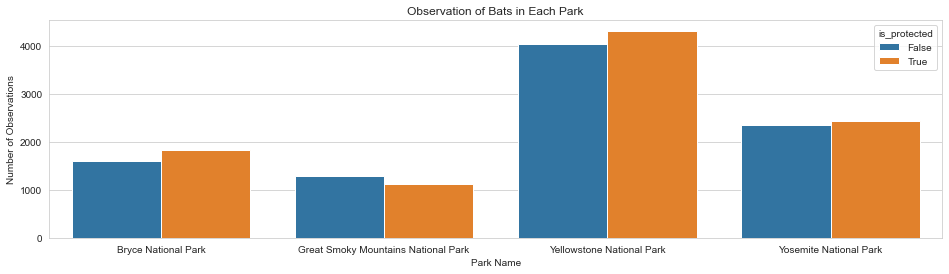

In [66]:
ax = plt.subplots(figsize=(16, 4))
sns.barplot(data=bat_park, x='park_name', y='observations', hue='is_protected')
plt.xlabel('Park Name')
plt.ylabel('Number of Observations')
plt.title('Observation of Bats in Each Park')